✅ Total images loaded: 4752
📏 Image shape: (4752, 524, 524)
👥 Unique persons: 9
✅ Encoded labels shape: (4752,)


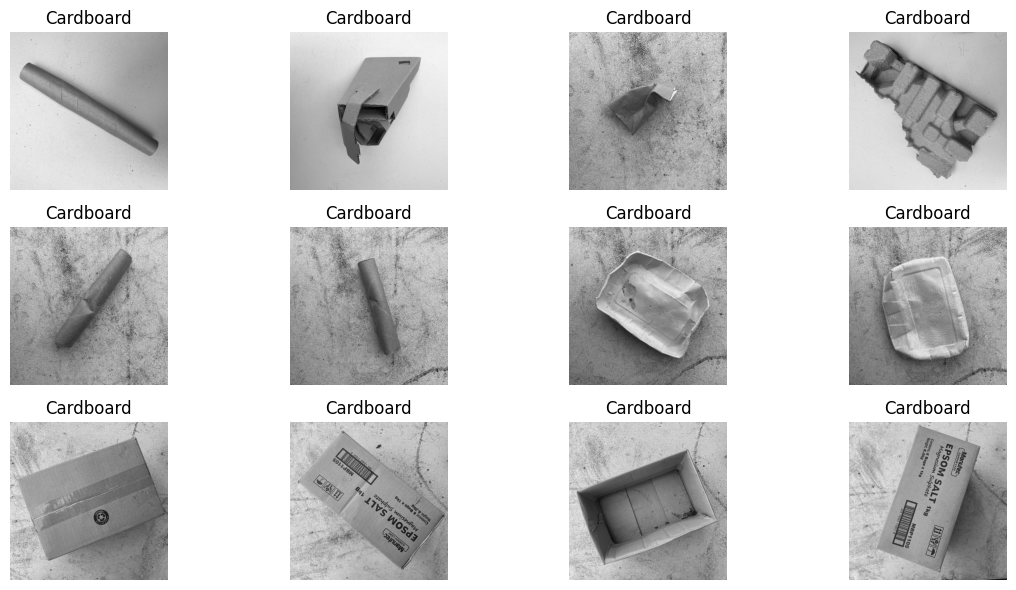

💾 Saved images.npy and labels.npy for future use.


In [5]:
# 01_data_loading_fixed.ipynb

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# Path to your dataset
# -----------------------------
dataset_path = r"C:\Users\User\Desktop\CNN asignment\realwaste\realwaste-main\RealWaste"


# Target image size (all images will be resized to this)
IMG_SIZE = (524, 524)

# -----------------------------
# Load images and labels
# -----------------------------
images = []
labels = []

for person in os.listdir(dataset_path):
    person_folder = os.path.join(dataset_path, person)
    if os.path.isdir(person_folder):
        for file in os.listdir(person_folder):
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                img_path = os.path.join(person_folder, file)
                try:
                    img = Image.open(img_path).convert('L')  # grayscale
                    img = img.resize(IMG_SIZE)  # resize to common shape
                    images.append(np.array(img))
                    labels.append(person)
                except Exception as e:
                    print(f"⚠️ Skipping {img_path}: {e}")

images = np.array(images)
labels = np.array(labels)

print("✅ Total images loaded:", len(images))
print("📏 Image shape:", images.shape)
print("👥 Unique persons:", len(np.unique(labels)))

# -----------------------------
# Encode labels to numeric values
# -----------------------------
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
print("✅ Encoded labels shape:", labels_encoded.shape)

# -----------------------------
# Visualize some sample images
# -----------------------------
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(labels[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# Save dataset arrays for later use
# -----------------------------
np.save("images.npy", images)
np.save("labels.npy", labels_encoded)
print("💾 Saved images.npy and labels.npy for future use.")
